# <b> OPAL to sdds converter
be sure to set the PYTHONPATH environment as ```export PYTHONPATH=/lstr/sahara/aard/philippe/codes/pyOPALTools/:$PYTHONPATH```

In [1]:
import sys 
import subprocess
from matplotlib import rc
import os 
sys.path.insert(0, '/lstr/sahara/aard/philippe/codes/pelegant_metis/scripts')
import numpy as np
import matplotlib.pyplot as plt
import eleganttool2
from IPython.display import display, Markdown
import opal 
# install directories for PELEGANT and SDDS tools (should not be needed)
sddspath='/lstr/sahara/aard/philippe/codes/pelegant_metis/epics/extensions/bin/linux-x86_64/'
appspath='/lstr/sahara/aard/philippe/codes/pelegant_metis/oag/apps/bin/linux-x86_64/'

FontSize=16
          
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', size = FontSize)

PWD=subprocess.run('pwd',stdout=subprocess.PIPE)
PWD.stdout

b'/lstr/sahara/aard/cphillips/ipynbfiles/conversion\n'

In [2]:
base = '/lstr/sahara/aard/cphillips/'

# base + what kind of charge + num_beams + gun 2 y4 + best of hof;     here, chosen either 4 or 6 linac cases for 2 and 5 nC charges

charge = base + '1nC/1beam/1cath2y4/metis_try3/21ADFB0FC43A4AE0/' # *****
#charge = base + '2nC/1beam/1cath2y4/metistry2/01E5F170CFE04D21/' # first case in HOF
#charge = base + '5nC/1beam/1cath2y4/metistry2/0493E3077B534387/' # *****; also first case in HOF

direc = charge

scrn  = 'YAG4.h5'
sddsfilename = 'dist_111_nb.sdds' # name of output sdds non binary file

In [3]:
coord = opal.load_dataset(direc,fname=scrn)
print(coord)




	H5 dataset.

	Number of steps: 1

	Available step attributes (18):

	#varepsilon         
	#varepsilon-geom    
	ENERGY              
	GlobalTrackStep     
	MEANP               
	RMSP                
	RMSX                
	RefPartP            
	RefPartR            
	SPOS                
	TIME                
	TotalCharge         
	TotalMass           
	centroid            
	dE                  
	maxR                
	meanTime            
	rmsTime             


	Available step datasets (10):

	id                  
	m                   
	px                  
	py                  
	pz                  
	q                   
	time                
	x                   
	y                   
	z                   



In [4]:
#coord.plot_phase_space('time', 'x', xsci=True, ysci=True)
# bugg in ENERGY parameter ouput from the hdf5 file ? 
meanp          = coord.getData('MEANP', step=0)
betagamma_mean = np.sqrt(np.sum(meanp[0,:]**2))
gamma_mean     = np.sqrt(1+betagamma_mean**2)
x  = coord.getData('x', step=0)
px = coord.getData('px', step=0)
y  = coord.getData('y', step=0)
py = coord.getData('py', step=0)
t  = coord.getData('time', step=0)
pz = coord.getData('pz', step=0)
id = coord.getData('id', step=0)
bcharge = coord.getData('TotalCharge', step=0)[0][0]
print(bcharge)

print(len(id))
A  = np.vstack((x,px/pz,y, py/pz, t, np.sqrt(px**2+py**2+pz**2),id))
np.shape(A)

-1.0000000000002641e-09
30000


(7, 30000)

In [5]:
eleganttool2.dump_sdds)(coord,direc+sddsfilename)
# do a sddsconvert -binary dist_10.sdds dist_10cm.sdds as Pelegant wants binary inputs


writing ...
done.


&sdds_beam
        input = "cath2yag4.sdds"
        input_type = "elegant"
        sample_interval = 1
&end

&track
&end


In [26]:
# Getting the data from the sdds file
Z1, Z2, Z3 = eleganttool.dumpParam(direc+sddsfilename)
display(Markdown(Z1))
display(Markdown(Z2))
display(Markdown(Z3))

<table style="width:100%">  <caption>Printout for SDDS file tmpsab</caption>  <tr>    <th>pAverage</th>    <th>St</th>    <th>Sdelta</th>    <th>s56</th>  </tr>  <tr>    <th></th>    <th>s</th>    <th></th>    <th>s</th>  </tr>  <tr bgcolor="#ddd">    <td style="text-align:center">9.957575e+01</td>    <td style="text-align:center">6.302069e-12</td>    <td style="text-align:center">4.578432e-03</td>    <td style="text-align:center">2.795864e-14</td>  </tr></table><br>

<table style="width:100%">  <caption>Printout for SDDS file tmpsab</caption>  <tr>    <th>enx</th>    <th>ecnx</th>    <th>alphax</th>    <th>betax</th>  </tr>  <tr>    <th>m</th>    <th>m</th>    <th></th>    <th>m</th>  </tr>  <tr bgcolor="#ddd">    <td style="text-align:center">7.584133e-06</td>    <td style="text-align:center">7.576131e-06</td>    <td style="text-align:center">1.258060e+00</td>    <td style="text-align:center">1.518083e+01</td>  </tr></table><br>

<table style="width:100%">  <caption>Printout for SDDS file tmpsab</caption>  <tr>    <th>eny</th>    <th>ecny</th>    <th>alphay</th>    <th>betay</th>  </tr>  <tr>    <th>m</th>    <th>m</th>    <th></th>    <th>m</th>  </tr>  <tr bgcolor="#ddd">    <td style="text-align:center">7.567404e-06</td>    <td style="text-align:center">7.551229e-06</td>    <td style="text-align:center">1.232387e+00</td>    <td style="text-align:center">1.485411e+01</td>  </tr></table><br>

# Two beam

In [1]:
import sys 
import subprocess
from matplotlib import rc
import os 
sys.path.insert(0, '/lstr/sahara/aard/philippe/codes/pelegant_metis/scripts')
import numpy as np
import matplotlib.pyplot as plt
import eleganttool2
from IPython.display import display, Markdown
import opal 
import scipy.constants as sc
# install directories for PELEGANT and SDDS tools (should not be needed)
sddspath='/lstr/sahara/aard/philippe/codes/pelegant_metis/epics/extensions/bin/linux-x86_64/'
appspath='/lstr/sahara/aard/philippe/codes/pelegant_metis/oag/apps/bin/linux-x86_64/'

FontSize=16
          
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', size = FontSize)

PWD=subprocess.run('pwd',stdout=subprocess.PIPE)
PWD.stdout

mm = 1e3
cms = sc.c

In [2]:
base = '/lstr/sahara/aard/cphillips/'

# base + what kind of charge + num_beams + gun 2 y4 + best of hof;     here, chosen either 4 or 6 linac cases for 2 and 5 nC charges
charge = '1nC/'

extra = ''
struct = 'squa/3p8behind/'
extra = 'centeredsqua/'
struct = '3p8behind/'
struct = '1p5lambda/'
extra = 'tscan/'
struct = 'idk/'


dstruct = 'drive/theory2/'
wstruct = 'witnessscan/theory9/'

direc = base + charge + '2beam/1cath2y4/'

dscrn  = 'YAG4.h5'
wscrn  = 'YAG4.h5'
dsddsfilename = 'dist_1d_nb.sdds' # name of output drive sdds non binary file
wsddsfilename = 'dist_1w_nb.sdds' # name of output witness sdds non binary file

print(direc+extra+dstruct)
print(direc+extra+wstruct)

/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/tscan/drive/theory2/
/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/tscan/witnessscan/theory9/


In [3]:
dcoord = opal.load_dataset(direc+extra+dstruct,fname=dscrn)
#print(dcoord)

wcoord = opal.load_dataset(direc+extra+wstruct,fname=dscrn)


#print(wcoord)

In [4]:
#eleganttool2.dump_sdds_opal2(dcoord,wcoord,direc+extra+'drive/'+dsddsfilename,direc+extra+'witness/'+wsddsfilename)
eleganttool2.dump_sdds_opal2(dcoord,wcoord,direc+extra+wstruct+dsddsfilename,direc+extra+wstruct+wsddsfilename)
# do following steps to prep for Elegant:
#      sddsconvert -binary dist_1d_nb.sdds dist_1d.sdds         # convert file to binary for Elegant
#      sddsprocess dist_1d.sdds -pipe=out -process=particleID,count,sname | sdds2stream -pipe=in -param=sname         # calculate how many particles (N) are in the drive bunch - take note for Elegant Evel
#      sddsconvert -binary dist_1w_nb.sdds dist_1w.sdds         # convert file to binary for Elegant
#      sddsprocess dist_1w.sdds -redefine=column,particleId,"particleID N +"         # add N to the witness
#      sddscombine -merge dist_1d.sdds dist_1w.sdds dist_10cm.sdds         # merge the two files - for the combined

Drive Avg Z:  11.59266369586206  m
Witness Avg Z:  11.58679906250814  m
Distance Behind:  5.864633353918606  mm
centered at 0 dt z mean:  -2.864032657822668e-16  m
centered at 0 wt z mean:  -0.005864633353918  m
dist between new means:  5.864633353917713  mm
writing ...
done.
writing ...
done.


In [8]:
# Let's check the file created by sddscombine
def get_dist_behind(direc):
    sdds_dr_t = subprocess.run(['sddsprocess',direc+extra+'dist_1d.sdds','temp.sdds','-process=t,average,tavg'])
    sdds_dr_tavg = subprocess.run(['sdds2stream','temp.sdds','-para=tavg'],capture_output=True,text=True)
    sdds_wi_t = subprocess.run(['sddsprocess',direc+extra+'dist_1w.sdds','temp.sdds','-process=t,average,tavg'])
    sdds_wi_tavg = subprocess.run(['sdds2stream','temp.sdds','-para=tavg'],capture_output=True,text=True)
    dzavg = float(sdds_dr_tavg.stdout.strip())*cms
    wzavg = float(sdds_wi_tavg.stdout.strip())*cms
    dist = dzavg - wzavg
    print('Drive Avg Z: ',dzavg,' m')
    print('Witness Avg Z: ',wzavg,' m')
    print('Distance Behind: ',dist*mm,' mm')

get_dist_behind(direc)

Error for sddsprocess:
Unable to open file "/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/tscan_squa/dist_1d.sdds" for reading (SDDS_InitializeInput)


Drive Avg Z:  -0.006047251263766659  m
Witness Avg Z:  -0.006047251263766659  m
Distance Behind:  0.0  mm


Error for sddsprocess:
Unable to open file "/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/tscan_squa/dist_1w.sdds" for reading (SDDS_InitializeInput)


Drive Bunch
1
number of macroparticles: 30000


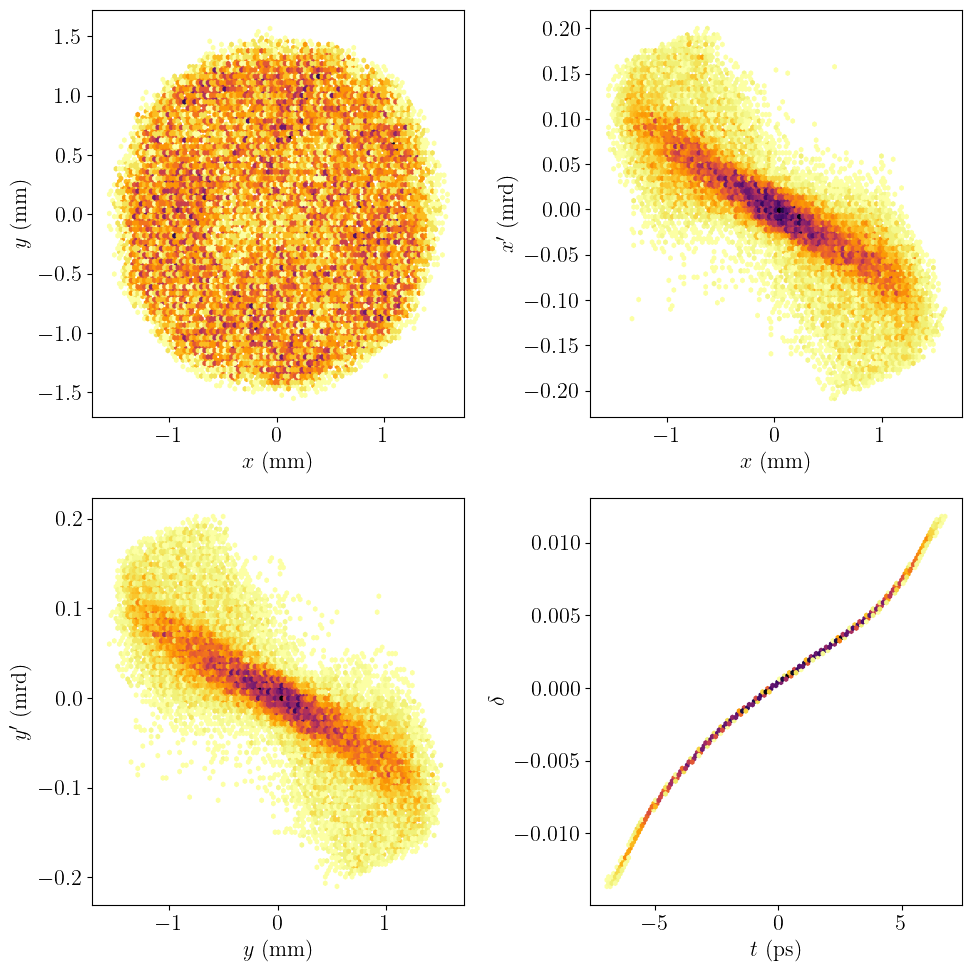

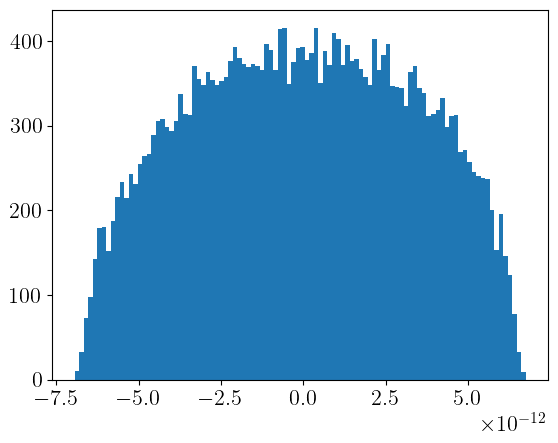

[5.44757307e-12 5.21528110e-12 6.29183418e-12 5.19829516e-12
 6.12991773e-12 5.84658270e-12 5.99088829e-12 5.52469561e-12
 6.30968692e-12 6.37246737e-12 6.59691533e-12 6.38172093e-12
 5.57531536e-12 5.78703982e-12 6.52829753e-12]
Witness Bunch
1
number of macroparticles: 30000


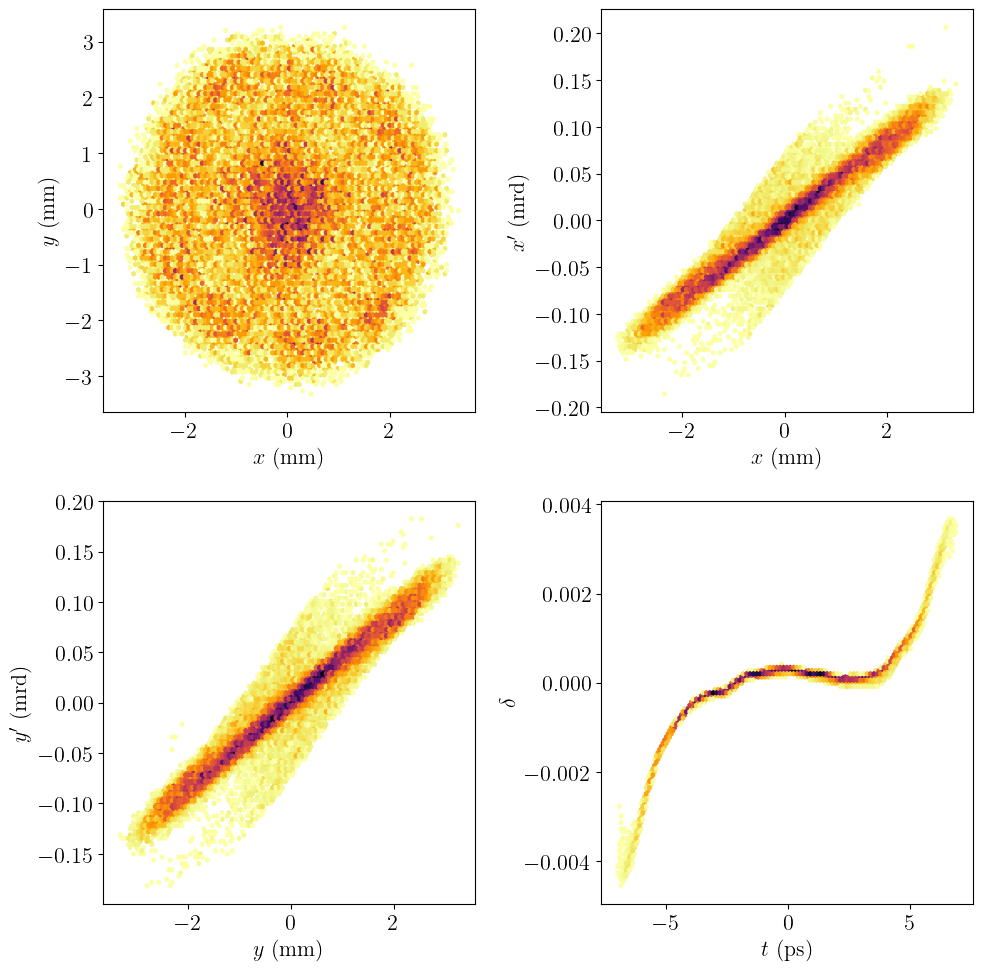

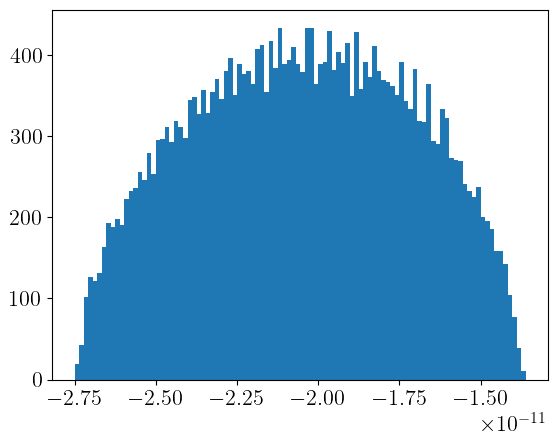

[-1.52666688e-11 -1.55203615e-11 -1.42165135e-11 -1.55683353e-11
 -1.43069758e-11 -1.46364941e-11 -1.44240973e-11 -1.50126504e-11
 -1.41691690e-11 -1.40364703e-11 -1.37897303e-11 -1.40877317e-11
 -1.49931060e-11 -1.46765716e-11 -1.38938505e-11]


In [6]:
# Plot Phase Space to check t for each is correct
print('Drive Bunch')
eleganttool2.plotsummaryPSpace(direc+dsddsfilename,nBins=101)

print('Witness Bunch')
eleganttool2.plotsummaryPSpace(direc+wsddsfilename,nBins=101)